In [1]:
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic
from surprise import dump
from surprise.accuracy import rmse
from FR_JIZHI import FR_JIZHI
from FR_Weight import FR_Weight
from FS_Threshold import FS_Threshold
from FS_Weight import FS_Weight
from GFusion import GFusion
from surprise import GridSearch
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
reader = Reader(line_format='user item rating', sep=':')
train_file = 'new_usr_ratings.train'
test_file = 'new_usr_ratings.test'
data = Dataset.load_from_folds([(train_file, test_file)], reader)

In [4]:
knn = KNNBasic(k=10)
fs_threshold = FS_Threshold(threshold=5, alpha=0.5, k=10)
fs_weight = FS_Weight(alpha=0.5, k=10, beta=0.8)
fr_weight = FR_Weight(alpha=0, k=10, beta=0.8)
gfusion = GFusion(k=10, alpha=0)
fr_jizhi=FR_JIZHI(alpha=1, k=30)

In [6]:
from surprise.accuracy import rmse

In [7]:
for trainset, testset in data.folds():
    knn.train(trainset)
    pre_knn = knn.test(testset)
    rmse(pre_knn)
    dump('./dump_knn', predictions=pre_knn)
    
    fs_threshold.train(trainset)
    pre_fs_threshold = fs_threshold.test(testset)
    rmse(pre_fs_threshold)
    dump('./dump_fs_threshold', predictions=pre_fs_threshold)
    
    fs_weight.train(trainset)
    pre_fs_weight = fs_weight.test(testset)
    rmse(pre_fs_weight)
    dump('./dump_fs_weight', predictions=pre_fs_weight)
    
    
    fr_weight.train(trainset)
    pre_fr_weight = fr_weight.test(testset)
    rmse(pre_fr_weight)
    dump('./dump_fr_weight', predictions=pre_fr_weight)
    
    gfusion.train(trainset)
    pre_gfusion = gfusion.test(testset)
    rmse(pre_gfusion)
    dump('./dump_gfusion', predictions=pre_gfusion)
    
    fr_jizhi.train(trainset)
    pre_fr_jizhi = fr_jizhi.test(testset)
    rmse(pre_fr_jizhi)
    dump('./dump_fr_jizhi', predictions=pre_fr_jizhi)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3940
('The dump has been saved as file', './dump_knn')
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the behavior similarity matrix...
Done computing behavior similarity matrix
RMSE: 1.3943
('The dump has been saved as file', './dump_fs_threshold')
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the behavior similarity matrix...
Done computing behavior similarity matrix
RMSE: 1.4166
('The dump has been saved as file', './dump_fs_weight')
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the behavior similarity matrix...
Done computing behavior similarity matrix
RMSE: 1.4011
('The dump has been saved as file', './dump_fr_weight')
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the behavior similarity matrix...
Done computing behavior similarity matrix
Computing the msd 

In [8]:
import pickle

In [9]:
dump_obj_knn = pickle.load(open('./dump_knn', 'rb'))
dump_obj_fs_threshold = pickle.load(open('./dump_fs_threshold', 'rb'))
dump_obj_fs_weight = pickle.load(open('./dump_fs_weight', 'rb'))
dump_obj_gfusion = pickle.load(open('./dump_gfusion', 'rb'))
dump_obj_fr_jizhi = pickle.load(open('./dump_fr_jizhi', 'rb'))
dump_obj_fr_weight = pickle.load(open('./dump_fr_weight', 'rb'))

In [10]:
df_knn = pd.DataFrame(dump_obj_knn['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_fs_th = pd.DataFrame(dump_obj_fs_threshold['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_fs_weight = pd.DataFrame(dump_obj_fs_weight['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_gfusion = pd.DataFrame(dump_obj_gfusion['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_fr_jizhi = pd.DataFrame(dump_obj_fr_jizhi['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_fr_weight = pd.DataFrame(dump_obj_fr_weight['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    


In [14]:
df_knn['err'] = abs(df_knn.est - df_knn.rui)
df_fs_th['err'] = abs(df_fs_th.est - df_fs_th.rui)
df_fs_weight['err'] = abs(df_fs_weight.est - df_fs_weight.rui)
df_gfusion['err'] = abs(df_gfusion.est - df_gfusion.rui)
df_fr_jizhi['err'] = abs(df_fr_jizhi.est - df_fr_jizhi.rui)
df_fr_weight['err'] = abs(df_fr_weight.est - df_fr_weight.rui)

In [15]:
df_knn.head()

,uid,iid,rui,est,details,err
0,helloivan,3412830,3.0,3.307978,"{u'actual_k': 10, u'was_impossible': False}",0.307978
1,loulouxu,21318488,0.0,3.241012,"{u'actual_k': 10, u'was_impossible': False}",3.241012
2,may-may,1790376,0.0,1.396704,"{u'actual_k': 10, u'was_impossible': False}",1.396704
3,falling__slowly,2132120,3.0,3.401052,"{u'actual_k': 10, u'was_impossible': False}",0.401052
4,52316424,25773932,4.0,3.474222,"{u'actual_k': 10, u'was_impossible': False}",0.525778


In [24]:
df_gfusion.iloc[df_knn.sort_values(by='err')[-10:].index]

,uid,iid,rui,est,details,err
51897,bettylwx,3778503,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0
90809,lightwing86,4236817,0.0,5.0,"{u'actual_k': 7, u'was_impossible': False}",5.0
50994,nanka,3286538,0.0,5.0,"{u'actual_k': 10, u'was_impossible': False}",5.0
48328,wanfang,2029920,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0
135964,lingci,5450875,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0
50256,54588016,25748643,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0
144391,92468807,3882715,0.0,5.0,"{u'actual_k': 10, u'was_impossible': False}",5.0
174314,73865605,24844328,0.0,5.0,"{u'actual_k': 2, u'was_impossible': False}",5.0
128852,sanfer,1580592,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0
56073,sanfer,1432660,0.0,5.0,"{u'actual_k': 1, u'was_impossible': False}",5.0


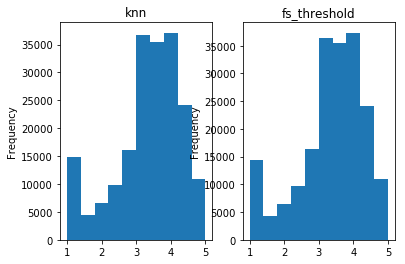

In [25]:
figure, (ax1, ax2) = plt.subplots(1, 2)
df_knn.est.plot(kind='hist', title='knn', ax=ax1)
df_gfusion.est.plot(kind='hist', title='fs_threshold', ax=ax2)

In [31]:
a = [('a', 5), ('b', 4)]

In [32]:
sorted(a, key=lambda x:x[1])

[('b', 4), ('a', 5)]

In [33]:
a

[('a', 5), ('b', 4)]